# Process Critical lines

In [89]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')
from time import time
from munch import munchify

from matplotlib.colors import to_rgba
colors = list(map(to_rgba, """
#55115c
#821760
#ab275e
#cd4158
#e7624f
#f88646
#ffad40
#ffd547
""".strip().split('\n'))) #https://learnui.design/tools/data-color-picker.html#palette

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


In [3]:
import numpy as np
from time import time
from operator import mul
from functools import reduce
from itertools import count
from munch import Munch
from itertools import zip_longest
import logging
import multiprocessing as mp

import re
from pathlib import Path

import scipy
from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes, normalise_IPR
from FKMC.import_funcs import shape_hints, timefmt

from FKMC.import_funcs import  mean_over_MCMC, IPRandDOS, extract, get_data_funcmap_chain_ext

## cdw_TJ_critical_line.ipynb data
This data is a diagonal stripe on the TJ plot

### Import the data

In [29]:
%%time
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

cdw_TJ = get_data_funcmap_chain_ext(Path('~/HPC_data/cdw_TJ_critical_line'),
            functions = [
                mean_over_MCMC('Mf_moments', N_error_bins = 10),
                            ],
            )

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line


[PosixPath('/rds/general/user/tch14/home/HPC_data/cdw_TJ_critical_line/code/cdw_TJ_critical_line.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=varying, U=5, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b70e5074f80>, accept_function=<function perturbation_accept at 0x2b70e5075320>, warnings=False,


INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 300


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Js', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 3 chains of 1000 for 3000 with thinning = 10 for 300 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Js': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 2.0 hours
        Min: 10.0 minutes
        Max: 12.0 hours
        Total: 5.0 weeks
    


497 498 499 CPU times: user 4.92 s, sys: 1.41 s, total: 6.33 s
Wall time: 15.3 s


In [12]:
cdw_TJ.hints.Mf_moments

('Ns', 'Rs', 'Js', 'Ts', 'nth moment')

/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(10, 10), (10, 10), (3, 10, 10)


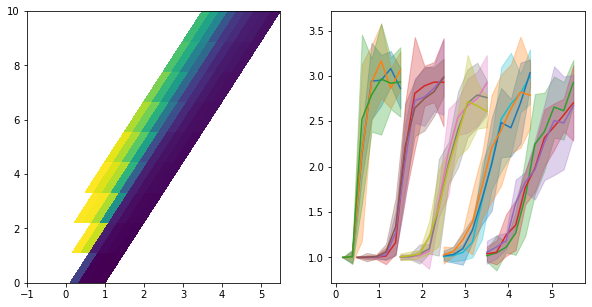

In [74]:
from scipy.stats import sem

d = cdw_TJ

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after
#M2 = d.Mf_moments[:, :, :, :, 2]
#M4 = d.Mf_moments[:, :, :, :, 4]
#B = np.nanmean(M4 / M2**2, axis = 1)
#dB = sem(M4 / M2**2, axis = 1)
#M2 = np.nanmean(M2, axis = 1)

n = 2
f, ax = plt.subplots(1,n, figsize = (n*5, 5), squeeze = False)

Js = cdw_TJ.Js[:, None] * np.ones_like(cdw_TJ.Ts)[None, :]
Ts = 2.25 * Js / 5 +  cdw_TJ.Ts[None, :]

shapes(Js, Ts, B)
ax[0, 0].pcolormesh(Ts, Js, M2[-1]) 

from FKMC.plotting import spread

J_i = 5

for J_i in range(1,10,2):
    for i, N in zip(count(), cdw_TJ.Ns):
        spread(ax[0,1], Ts[J_i], B[i, J_i, :], dB[i, J_i, :])


[0.03115687 0.02116269 0.0590885  0.19436326 0.16517541 0.47720558
 0.19609965 0.29813924 0.29642613 0.30526582]
[0.02307334 0.02759308 0.10600739 0.05194373 0.53185069 0.23489227
 0.41646006 0.37397006 0.35580578 0.18683461]
[0.03695282 0.04768065 0.04100759 0.17963564 0.42198099 0.17651544
 0.24819748 0.51331221 0.25461085 0.17256525]


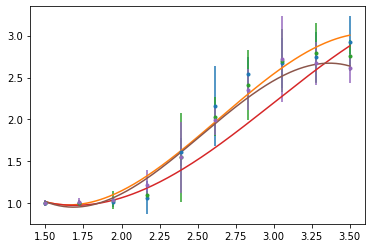

In [75]:
from scipy.interpolate import interp1d, UnivariateSpline

f, ax = plt.subplots()
J_i = 5

for i, N in enumerate(d.Ns):
    #calculate the spline fits    
    #some of the errors come out as zero so clamp to them a reasonable nonzero value
    #which I choose to be 10% of the mean error
    d.B = B[i, J_i]
    d.dB = np.maximum(dB[i, J_i, :], dB[i, J_i, :].mean() * 0.1)
    d.BX = Ts[J_i][:]
    print(d.dB)

    binder_interped = UnivariateSpline(d.BX, d.B, w = 1/d.dB, s = len(d.BX))
    
    #plot the binder cumulant
    ax.errorbar(d.BX, d.B, yerr = d.dB, linestyle = "None", marker = '.')
    #axes[1].plot(d.BX, d.B[i], label = f'N = {N}', color = color)
    
    x = np.linspace(d.BX[0], d.BX[-1], 200)
    ax.plot(x, binder_interped(x))
    


## cdw_TU_critical_line.ipynb data
This data is a vertical stripe on the TU plot

### Import the data

In [59]:
%%time
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

cdw_TU = get_data_funcmap_chain_ext(Path('~/HPC_data/cdw_TU_critical_line'),
            functions = [
                mean_over_MCMC('Mf_moments', N_error_bins = 10),
                            ],
            )

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line


[PosixPath('/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/code/cdw_TU_critical_line.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=varying, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b70e5074f80>, accept_function=<function perturbation_accept at 0x2b70e5075320>, warnings=False,


INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 400


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 4 chains of 1000 for 4000 with thinning = 10 for 400 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Us': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 2.0 hours
        Min: 12.0 minutes
        Max: 15.0 hours
        Total: 6.0 weeks
    


498 499 CPU times: user 6.66 s, sys: 2.61 s, total: 9.28 s
Wall time: 36.9 s


(10, 10), (10,), (3, 10, 10)


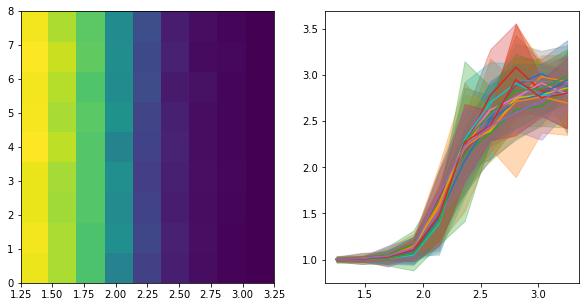

In [78]:
from scipy.stats import sem

d = cdw_TU

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after
#M2 = d.Mf_moments[:, :, :, :, 2]
#M4 = d.Mf_moments[:, :, :, :, 4]
#B = np.nanmean(M4 / M2**2, axis = 1)
#dB = sem(M4 / M2**2, axis = 1)
#M2 = np.nanmean(M2, axis = 1)

n = 2
f, ax = plt.subplots(1,n, figsize = (n*5, 5), squeeze = False)

Us = d.Us
Ts = d.Ts

shapes(Js, Ts, B)
ax[0, 0].pcolormesh(Ts, Us, M2[-1]) 

from FKMC.plotting import spread

U_i = 5

for U_i in range(1,10,2):
    
    for i, N in zip(count(), d.Ns):
        spread(ax[0,1], Ts, B[i, U_i, :], dB[i, U_i, :])

[0.01692516 0.03166514 0.04917519 0.07289924 0.2902797  0.38293205
 0.21148299 0.27630617 0.14923951 0.21929729]
[0.02707742 0.05620179 0.07207146 0.07026449 0.44701367 0.35772872
 0.31758978 0.3959622  0.32957265 0.40048997]
[0.0260754  0.03626087 0.07437088 0.10894064 0.37851468 0.50535901
 0.32451349 0.43037622 0.34421296 0.29553966]


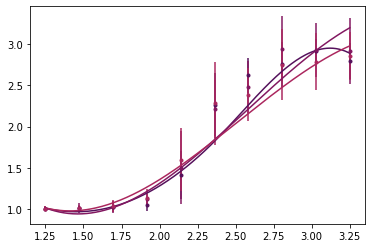

In [91]:
from scipy.interpolate import interp1d, UnivariateSpline

f, ax = plt.subplots()
U_i = 5

for i, N in enumerate(d.Ns):
    #calculate the spline fits    
    #some of the errors come out as zero so clamp to them a reasonable nonzero value
    #which I choose to be 10% of the mean error
    d.B = B[i, U_i]
    d.dB = np.maximum(dB[i, U_i, :], dB[i, U_i, :].mean() * 0.1)
    d.BX = Ts
    print(d.dB)

    binder_interped = UnivariateSpline(d.BX, d.B, w = 1/d.dB, s = len(d.BX))
    
    #plot the binder cumulant
    l = ax.errorbar(d.BX, d.B, yerr = d.dB, linestyle = "None", marker = '.', color = colors[i])
    #axes[1].plot(d.BX, d.B[i], label = f'N = {N}', color = color)
    
    x = np.linspace(d.BX[0], d.BX[-1], 200)
    ax.plot(x, binder_interped(x), color = colors[i])

## gap_gapped_TU_critical_line.ipynb data
This data is a horixontal stripe on the TU plot

### Import the data

In [94]:
%%time
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

gap_TU = get_data_funcmap_chain_ext(Path('~/HPC_data/gap_gapped_TU_critical_line'),
            functions = [
                mean_over_MCMC('Mf_moments', N_error_bins = 10),
                IPRandDOS(),
                            ],
            )

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line


[PosixPath('/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line/code/gap_gapped_TU_critical_line.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=varying, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b70e5074f80>, accept_function=<function perturbation_accept at 0x2b70e5075320>, warnings=False,


INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 300


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'E_bins', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'DOS', 'IPR', 'dDOS', 'dIPR', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 3 chains of 1000 for 3000 with thinning = 10 for 300 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Us': 20, 'Ts': 10}
    Ns = [250]
    Runtimes: 
        Average: 3.0 hours
        Min: 1.0 hours
        Max: 11.0 hours
        Total: 23.0 weeks
    


CPU times: user 1min 43s, sys: 22 s, total: 2min 5s
Wall time: 1min 11s


166.66666666666035
0.0


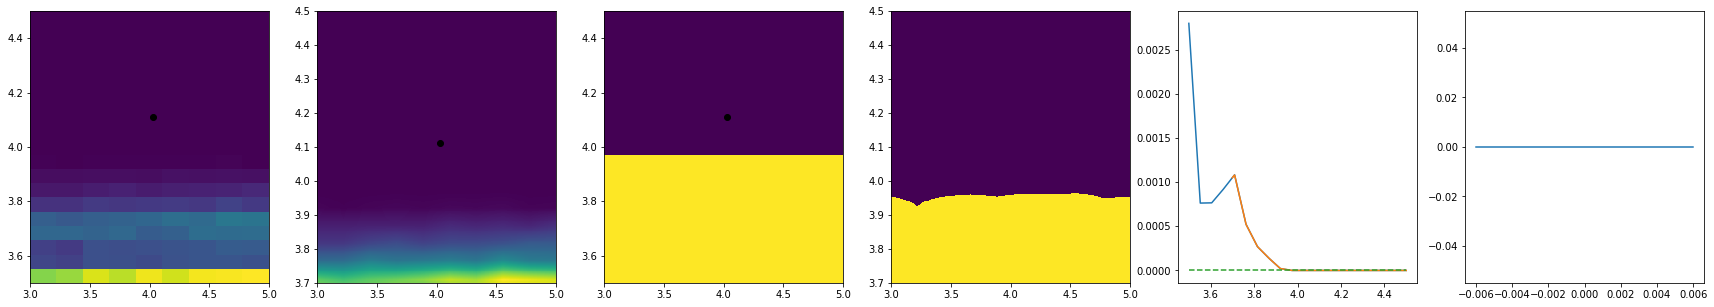

In [236]:
def spline_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RectBivariateSpline
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    o.Y = RectBivariateSpline(Us, Ts, Y, kx = 3, ky = 3, s = 0.00001)(o.Us, o.Ts, grid = True)
    return o
    
def linear_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RegularGridInterpolator
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    
    positions = np.vstack([o.gridUs.ravel(), o.gridTs.ravel()]).T
    o.Y = RegularGridInterpolator((Us, Ts), Y)(positions).reshape([o.Us.size, o.Ts.size])
    return o

d = gap_TU
Ui = 10
Ti = 5

e = 0.01
ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

DOS = d.DOS[-1, :, :, :, :].mean(axis = 0)
normalisation = DOS.sum(axis = -1)[0, 0]
print(normalisation)
percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation

single = np.nanmean(d.DOS[-1, :, Ui, Ti, :], axis = 0)

f, ax = plt.subplots(1,6, figsize = (30, 5), gridspec_kw = dict())


ax[0].pcolormesh(d.Ts, d.Us, percent_low_E_states, linewidth=0, rasterized = True)

threshold = 0.001 / 100
newgrid = np.mgrid[3.7:4.5:300j, 3:5:300j]
interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)


from FKMC.general import get_nearby_index
T = 4
T, i = get_nearby_index(d.Ts, T)
ax[4].plot(d.Us, percent_low_E_states[:, i])

T, i = get_nearby_index(interpolated.Ts, T)
ax[4].plot(interpolated.Us, interpolated.Y[:, i])

ax[1].pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)



ax[0].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[1].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[2].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')

threshold = 0.000005
ax[4].plot((3.5, 4.5), (threshold, threshold), '--')

ax[2].pcolormesh(d.Ts, d.Us, (percent_low_E_states > 0), linewidth=0, rasterized = True)
ax[3].pcolormesh(interpolated.Ts, interpolated.Us, (interpolated.Y > threshold), linewidth=0, rasterized = True)

single[~ix] = np.NaN

ax[5].plot(d.E_bins[:-1], single)

percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation
print(percent_low_E_states[Ui, Ti])

166.66666666666038
166.66666666666035
166.66666666666038
166.66666666666035
166.66666666666038


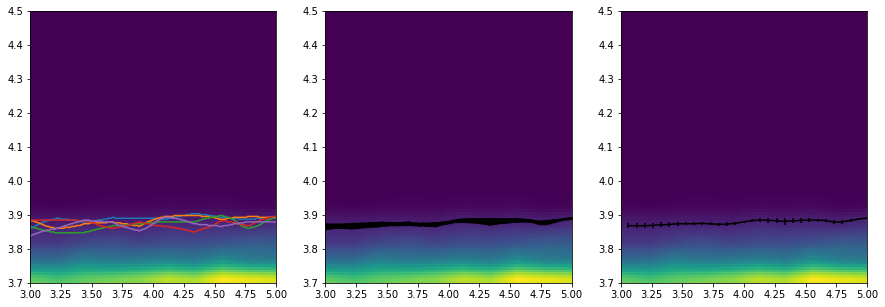

In [260]:
f, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5), gridspec_kw = dict())
pcol = ax.pcolormesh(Ts, Us, interped, linewidth=0, rasterized = True, alpha = 1)
pcol = ax2.pcolormesh(Ts, Us, interped, linewidth=0, rasterized = True, alpha = 1)
pcol = ax3.pcolormesh(Ts, Us, interped, linewidth=0, rasterized = True, alpha = 1)

edgeUs = []

def extract_edge(U, T, Y):
    #uses the fact that argmax returns the position of the first "True" value
    #uses [:, ::-1] because we want the last along the U axis
    #but that gives us it measured from the end, so use it as a negative index
    edge = -np.argmax((Y == 1)[:, ::-1], axis = 1)
    nonzero = (edge != 0)
    edgeU = U[edge[nonzero]]
    edgeT = T[nonzero]
    
    return edgeU, edgeT

for i in d.Rs:

    #the width of the energy bin to use
    e = 0.01
    #the indices of that energy bin into the data
    ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

    DOS = d.DOS[-1, i, :, :, :]

    #the observed number of states
    normalisation = DOS.sum(axis = -1)[0, 0]
    print(normalisation)

    #the percentage of states near 0
    percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation
    
    threshold = 0.01 / 100
    newgrid = np.mgrid[3.7:4.5:300j, 3:5:300j]
    
    interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    #interpolated = spline_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    
    #do it without any interpolation
    #edgeU, edgeT = extract_edge(d.Us, d.Ts, (percent_low_E_states.T > 0) & (M2 < 0.7))
    
    edgeU, edgeT = extract_edge(interpolated.Us, interpolated.Ts, interpolated.Y.T > threshold)
    
    #pcol = ax.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True, alpha = 1)
    ax.plot(edgeT, edgeU, alpha = 1)
    edgeUs.append(edgeU)
    
edgeUs = np.array(edgeUs)
spread(ax2, edgeT, edgeUs.mean(axis = 0), dY = sem(edgeUs, axis = 0), alpha = 1, color = 'k')

edgeUs = np.array(edgeUs)
ax3.errorbar(edgeT[9::10], edgeUs.mean(axis = 0)[9::10], yerr = sem(edgeUs, axis = 0)[9::10], alpha = 1, color = 'k')

#edgeUs = np.array(edgeUs)
#spread(ax3, edgeT, edgeUs.mean()*np.ones_like(edgeT), dY = sem(edgeUs, axis = 0).max(), alpha = 1, color = 'k')

    
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TU_phase_gap_gapless_line.pickle', 'wb') as file: 
    line = dict(
        energy_interval = e,
        DOS = DOS,
        M2 = M2,
        percent_low_E_states = percent_low_E_states,
        Y = Y,
        U = edgeUs.mean(axis = 0),
        T = edgeT,
        dU = sem(edgeUs, axis = 0),
        )
    pickle.dump(line, file)